In [2]:
import os
import pandas as pd
import openpyxl
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import glob
import seaborn as sns

## MONITORAMENTO MENSAL DO CONSUMO DE ÁGUA DA UFSC 2013 - 2024

#### Importação e estrutura de organização dos dados MENSAIS 2013/01 a 2024/09
###### - Parte 3 - Visualização de informações a partir de um único df
- Passo 0 - funções para carregar csv unico com com todos os dados de água de 2023 ao momento presente
- Passo 1 - gerar df única com todos os dados de água de 2023 ao momento presente
###### - Parte 4 - Matplotlib
##### - Groupby por ano soma¶
##### - Groupby por ano soma¶ e por hidrômetro

###### Nome: Djesser Zechner Sergio

###### https://github.com/Djesser/ENS410064.git

In [3]:
# Passo 0 - funções para carregar csv unico com com todos os dados de água de 2023 ao momento presente


#Main def1
def main_abrir_csv_unico_func():
    dados_agua_df = abrir_csv_unico_func(pasta_produtos_func(pasta_projeto_func()))
    return dados_agua_df   
    
#sub-def 1: -------------------------------------
def pasta_projeto_func():
    pasta_projeto = r'I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Projeto'
    return pasta_projeto

#sub-def 2: -------------------------------------
def pasta_produtos_func(pasta_projeto):
    pasta_produtos = os.path.join(pasta_projeto, 'Dados', 'Produtos')
    return pasta_produtos
        
#sub-def 3: -------------------------------------
def abrir_csv_unico_func(pasta_produtos):
    os.chdir(pasta_produtos)
    caminho_dados_agua_csv = os.path.join(pasta_produtos, 'dados_agua_df.csv')
    dados_agua_df = pd.read_csv(caminho_dados_agua_csv)
    return dados_agua_df

# Passo 1 - gerar df única com todos os dados de água de 2023 ao momento presente

dados_agua_df = main_abrir_csv_unico_func()
dados_agua_df['ANO'] = dados_agua_df['ANO'].astype('int')

# Passo 2 - Extrair da df única apenas as colunas de interesse
# VOLUME_FATURADO	
# VALOR_AGUA	
# VALOR_ESGOTO	
# DESCONTOS	
# OUTROS	
# MULTAS_JUROS	
# VALOR_TOTAL

groupby_anos_soma = dados_agua_df.iloc[:,[18,21, 22, 23 ,24 ,25, 26]].groupby(dados_agua_df['ANO']).sum().round(2)
display(groupby_anos_soma.round(2))
groupby_anos_soma.describe().round(2)

#### 3.4 - Operações Groupby - groupby_anos_soma

In [6]:
## erro com groupby str corrigido com selct_dtypes = 'number' 
## https://stackoverflow.com/questions/51907282/pandas-groupby-typeerror-unsupported-operand-types-for-str-and-str

# volume total de água por ano

#groupby_anos_soma = dados_agua_df.select_dtypes('number').groupby(dados_agua_df['ANO']).sum()
groupby_anos_soma = dados_agua_df.iloc[:,[18,21,22,23,24,25,26]].groupby(dados_agua_df['ANO']).sum().round(2)
display(groupby_anos_soma)
groupby_anos_soma.describe().round(2)

,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
ANO,,,,,,,
2013,399689.00,2853769.81,2140482.02,-473011.60,0.00,16485.79,4537726.02
2014,381685.00,2916140.66,2160137.27,-481284.83,0.00,18759.65,4613752.75
2015,424762.00,3509116.50,2556541.15,-576418.92,229.22,43826.12,5533294.07
2016,413896.00,3763534.60,2818958.43,-431515.21,10244.49,98031.68,6259253.99
2017,410132.00,4067488.27,3093897.21,-675949.77,33080.29,7263.93,6525779.93
2018,424491.66,4576319.45,3293931.47,-713484.02,188450.48,17643.94,7365996.16
2019,362614.41,3883324.48,3081085.35,-648955.87,108303.77,1300716.04,7724473.77
2020,183841.00,2107155.36,1718506.68,-369524.11,70.88,3596.60,3458965.11
2021,177347.00,2160834.34,1716128.36,-393288.46,-7397.97,4950.97,3481226.08


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,327209.62,3407665.09,2646733.30,-567952.34,26561.70,132589.15,5645103.28
std,98331.75,775166.61,594199.09,136644.62,60445.69,368865.78,1408974.07
min,177347.00,2107155.36,1716128.36,-794049.60,-12525.38,-103.78,3458965.11
25%,239467.29,2900547.95,2155223.46,-666287.59,-487.96,6685.69,4594746.07
50%,372149.70,3528333.27,2720283.72,-585648.84,35.44,18201.79,5820053.79
75%,411073.00,3929365.43,3118182.99,-462637.50,15953.44,43818.07,6593604.71
max,424762.00,4576319.45,3368482.32,-369524.11,188450.48,1300716.04,7724473.77


#### 3.5 - Operações Groupby - groupby_anos_cod_hidrometro

In [7]:
# volume total de água por ano por hidrômetro
# volume total de água por ano
dict_groupby_anos_cod_hidrometro = {}
for ano in dados_agua_df['ANO'].unique():
    groupby_anos_cod_hidrometro = dados_agua_df.iloc[:,[18,21,22,23,24,25,26]].groupby(dados_agua_df['COD_HIDROMETRO']).sum()
    nome = (f'{ano}')
    dict_groupby_anos_cod_hidrometro[nome] = groupby_anos_cod_hidrometro
for item in dict_groupby_anos_cod_hidrometro:
    print(f'Ano: {item} ')
    display(dict_groupby_anos_cod_hidrometro[item].head())    

Ano: 2013 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


Ano: 2014 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


Ano: 2015 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


Ano: 2016 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


Ano: 2017 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


Ano: 2018 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


Ano: 2019 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


Ano: 2020 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


Ano: 2021 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


Ano: 2022 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


Ano: 2023 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


Ano: 2024 


,VOLUME_FATURADO,VALOR_AGUA,VALOR_ESGOTO,DESCONTOS,OUTROS,MULTAS_JUROS,VALOR_TOTAL
COD_HIDROMETRO,,,,,,,
H001,4225.0,40147.12,3212.73,-4118.75,3.91,220.40,39465.41
H002,7353.0,71647.21,5886.98,-7353.80,1.81,278.70,70460.90
H003,59881.0,625253.31,55473.81,-64622.70,59.98,3050.73,619215.13
H004,10396.0,109976.64,19057.87,-12227.77,0.91,358.54,117166.19
H005,29523.0,296878.71,12868.50,-30296.76,32.47,1783.33,281266.25


### Parte 4 - Matplotlib
#### Groupby por ano soma

In [8]:
def pasta_auxiliar_func(pasta_projeto):
    pasta_auxiliar = pasta_projeto +'\\'+'Auxiliar'
    print('pasta_auxiliar', pasta_auxiliar)
    return pasta_auxiliar
 
def pasta_figuras_func(pasta_projeto):
    # mudando para pasta de figuras
    pasta_figuras = os.path.join(pasta_projeto, 'Figuras')
    print('Pasta figuras: ', pasta_figuras)
    return pasta_figuras

def abrir_imagem_salva_pasta_auxiliar(nome_imagem):
    pasta_projeto = pasta_projeto_func()
    pasta_auxiliar = pasta_auxiliar_func(pasta_projeto)
    from IPython.display import Image
    caminho_imagem = pasta_auxiliar +'\\'+ nome_imagem
    imagem = Image(filename= caminho_imagem)
    return imagem

def abrir_imagem_salva_pasta_figuras(nome_imagem):
    pasta_projeto = pasta_projeto_func()
    pasta_figuras = pasta_figuras_func(pasta_projeto)
    from IPython.display import Image
    caminho_imagem = pasta_figuras +'\\'+ nome_imagem
    imagem = Image(filename= caminho_imagem)
    return imagem
    

In [11]:
colunas_gb = groupby_anos_soma.columns[[0,-1]]
colunas_gb

Index(['VOLUME_FATURADO', 'VALOR_TOTAL'], dtype='object')

In [10]:
def format_tick_labels(x, pos):
  return '{0:,.0f}'.format(x)

def gerar_e_salvar_figuras_groupby_ano_soma(groupby_anos_soma):

    pasta_projeto = pasta_projeto_func()

    pasta_figuras = pasta_figuras_func(pasta_projeto)

    linhas_index_gb = groupby_anos_soma.index
    print('linhas_index_gb', linhas_index_gb)

    #seleção de colunas
    colunas = [0, -1]
    colunas_gb = groupby_anos_soma.columns[[colunas[0],colunas[1]]]
    print('colunas_gb',colunas_gb)
    print('nº de colunas', len(colunas_gb))
    lista_cores  =   ( 'b',  'r') #https://matplotlib.org/2.0.1/api/colors_api.html
    lista_unidades = ('m\u00B3', 'R$')
    #https://stackoverflow.com/questions/8651361/how-do-you-print-superscript
    #https://magictool.ai/tool/character-map-symbol/pt/?hex=00B3
          
    fig, axs = plt.subplots(len(colunas_gb),1,figsize = (10, 7))
    
    os.chdir(pasta_figuras)    
    
    for i, item in enumerate (colunas_gb):
                 
        try:
            nome = item.split('_')
            nome = nome[0] + ' '+ nome [1]
            y_label = nome + ' ' + lista_unidades[i]
        except:
            nome = item
            y_label = nome + ' ' + lista_unidades[i]
            
        xdata = groupby_anos_soma.index
        ydata = groupby_anos_soma.iloc[:,colunas[i]]
        
        bar = axs[i].bar(xdata, ydata , color=lista_cores[i], label = y_label, width=0.5)
        axs[i].bar_label(bar, fmt="%.0f", size=7, label_type="edge", color=lista_cores[i] )

        #https://www.pythoncheatsheet.org/cheatsheet/string-formatting
        #axs[i].yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
        axs[i].set_ylabel(y_label, fontsize = 8)
        axs[i].set_xlabel(xdata.name, fontsize = 8)
        
        xticks = np.arange(min(xdata),max(xdata+1), 1)
        axs[i].set_xticks(xticks)
        axs[i].set_xticklabels(xticks, fontsize=8)

        yticks = axs[i].get_yticks()
        axs[i].tick_params(axis='y', labelsize=8)
        axs[i].yaxis.set_major_formatter(ticker.FuncFormatter(format_tick_labels))
        #axs[i].yaxis.set_major_formatter(ticker.EngFormatter())
        
        
        axs[i].set_title(nome)
        #axs[i].axhline(y=0.002,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
        axs[i].grid() 
        #https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def
        #handles, labels = ax.get_legend_handles_labels()
        #ax.legend(handles, labels)
        axs[i].legend() 
       
    # https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html
    
    #fig.title(f'UFSC Dados Água {groupby_anos_soma.index[0]} - {groupby_anos_soma.index[-1]}')
    fig.tight_layout()
    nome_imagem = f'UFSC Dados Água {groupby_anos_soma.index[0]} - {groupby_anos_soma.index[-1]}'
    nome_imagem = nome_imagem + ".png"
    imagem = fig.savefig(nome_imagem, dpi=100)
    print(nome_imagem)
    os.chdir(pasta_projeto)
    plt.show()

    return nome_imagem

Pasta figuras:  I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Projeto\Figuras
linhas_index_gb Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int32', name='ANO')
colunas_gb Index(['VOLUME_FATURADO', 'VALOR_TOTAL'], dtype='object')
nº de colunas 2
UFSC Dados Água 2013 - 2024.png


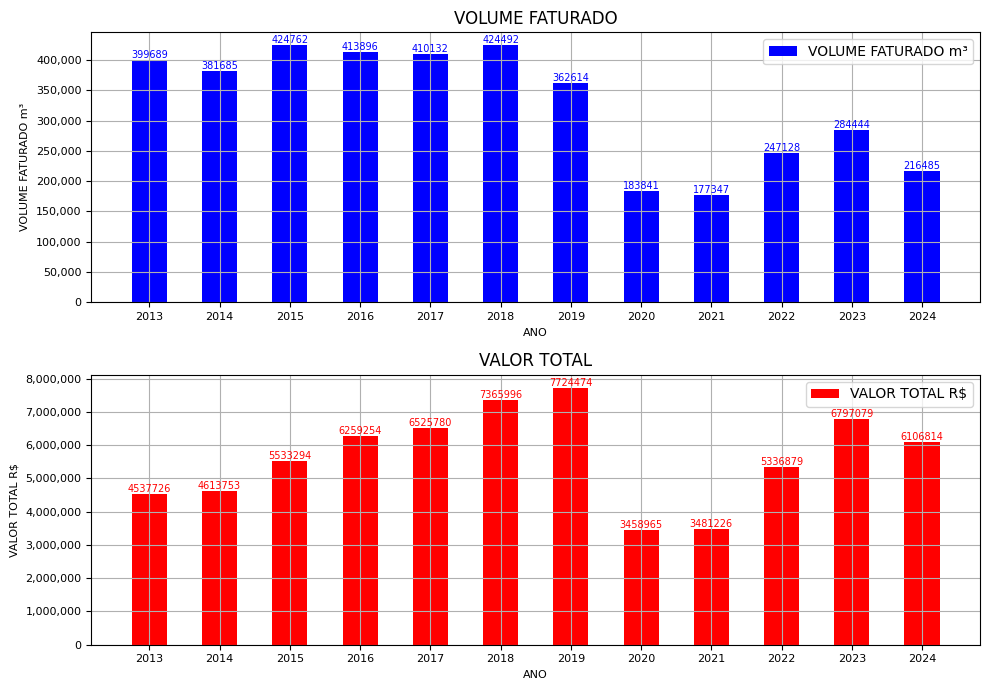

In [11]:
nome_imagem = gerar_e_salvar_figuras_groupby_ano_soma(groupby_anos_soma)

- análise da série temporal utilizando um lineplot. Neste lineplot vocês devem apresentar a série e uma mancha com os valores mínimos e máximos.

In [16]:
def lineplot_func(data, xdata, ydata, ylabel, nome, xticks_passo):

  pasta_projeto = pasta_projeto_func()
  pasta_figuras = pasta_figuras_func(pasta_projeto) 
  
  fig, ax = plt.subplots(1,1, figsize=(10, 3))
  sns.lineplot(data=data, label= ylabel)
  ax.fill_between(xdata, ydata.min(), ydata.max(), alpha=0.3, label='Mín e Max')

  xticks = np.arange(min(xdata),max(xdata+1), xticks_passo)
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticks, fontsize=8)
  yticks = ax.get_yticks()
  ax.tick_params(axis='y', labelsize=8)
  ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_tick_labels))

  nome_imagem = f'{nome} {xdata[0]} - {xdata[-1]}'
  ax.set_title(nome_imagem)
  ax.set_xlabel(xdata.name)
  ax.set_ylabel(ylabel)
  ax.legend()
  ax.grid(True)
  plt.show()

  os.chdir(pasta_figuras) 
  imagem = fig.savefig(nome_imagem, dpi=100)
  print(nome_imagem)
  os.chdir(pasta_projeto)



Pasta figuras:  I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Projeto\Figuras


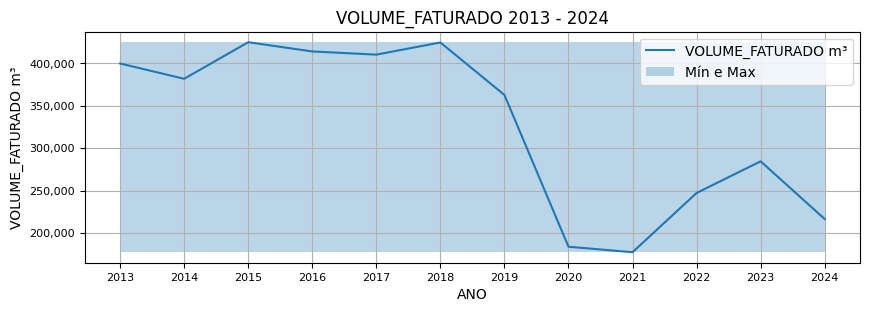

VOLUME_FATURADO 2013 - 2024


In [17]:
#Volume Faturado por ano

data = groupby_anos_soma.iloc[:,0]
nome = f'{data.name}'
xdata = data.index
ydata = data
ylabel = nome + ' m\u00B3'
xticks_passo = 1

#Lineplot

lineplot_func(data, xdata, ydata, ylabel, nome, xticks_passo)

#### Reorganizando totais mensais
#### - Agrupando dados por ano e por mês a partir de dados_agua_df com dados de volume faturado mensal
#### - lineplot de dados mensais agrupados

Pasta figuras:  I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Projeto\Figuras


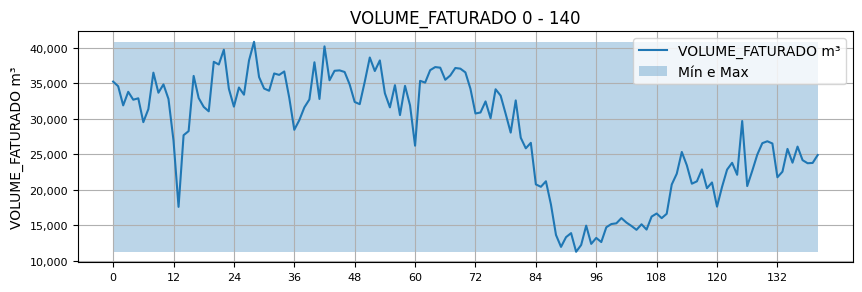

VOLUME_FATURADO 0 - 140


In [18]:
volume_faturado_por_mes_ano = dados_agua_df.groupby(['ANO', 'MES_N'])['VOLUME_FATURADO'].sum().reset_index().round(2)
valor_total_por_mes_ano = dados_agua_df.groupby(['ANO', 'MES_N'])['VALOR_TOTAL'].sum().reset_index().round(2)
dados_agua_df_por_mes_ano = pd.merge(volume_faturado_por_mes_ano, valor_total_por_mes_ano, on=['ANO', 'MES_N'])
dados_agua_df_por_mes_ano

#dados_agua_df_por_mes_ano = Volume Faturado

data = dados_agua_df_por_mes_ano.iloc[:,2]
nome = f'{data.name}'
xdata = data.index
ydata = data
ylabel = nome + ' m\u00B3'
xticks_passo = 12

#Lineplot

lineplot_func(data, xdata, ydata, ylabel, nome, xticks_passo)

- análise da série temporal através de um boxplot. Série toda e agregando períodos (ex: hora do dia, dia da semana, mês do ano, estação ano, período decadal)

- Convertendo dados_agua_df_por_mes_ano em uma nova tabela de anos vs meses com dados de volume mensal
- Boxplot dos dados agregados mensais

In [19]:
volume_faturado_por_mes_ano = dados_agua_df_por_mes_ano.pivot(index='ANO', columns='MES_N', values='VOLUME_FATURADO')
volume_faturado_por_mes_ano

MES_N,1,2,3,4,5,6,7,8,9,10,11,12
ANO,,,,,,,,,,,,
2013,35231.00,34578.00,31881.00,33792.00,32679.00,32879.00,29519.00,31356.00,36494.00,33665.00,34836.00,32779.00
2014,26911.00,17585.00,27679.00,28257.00,36030.00,32911.00,31667.00,31046.00,38020.00,37640.00,39725.00,34214.00
2015,31706.00,34401.00,33386.00,38207.00,40841.00,35867.00,34254.00,33942.00,36379.00,36173.00,36659.00,32947.00
2016,28441.00,29806.00,31602.00,32717.00,37952.00,32785.00,40193.00,35418.00,36754.00,36813.00,36585.00,34830.00
2017,32361.00,32052.00,35207.00,38625.00,36724.00,38214.00,33588.00,31599.00,34731.00,30519.00,34633.00,31879.00
2018,26202.00,35340.00,35091.00,36844.32,37277.33,37191.53,35488.17,36098.54,37149.64,37054.84,36527.31,34226.97
2019,30736.42,30881.95,32439.77,30070.38,34152.87,33254.71,30689.88,28047.21,32581.54,27320.89,25832.79,26606.00
2020,20752.00,20412.00,21193.00,17915.00,13629.00,11948.00,13322.00,13887.00,11259.00,12213.00,14941.00,12370.00
2021,13210.00,12628.00,14713.00,15166.00,15270.00,16005.00,15372.00,14895.00,14352.00,15132.00,14388.00,16216.00


In [34]:
#img02 = abrir_imagem_salva_pasta_auxiliar(nome_imagem)
#display(img02)
#nome_imagem = "img03.png"
#img03 = abrir_imagem_salva_pasta_auxiliar(nome_imagem)
#display(img03)
#nome_imagem = "img04.png"
#img04 = abrir_imagem_salva_pasta_auxiliar(nome_imagem)
#display(img04)
#nome_imagem = "img05.png"
#img05 = abrir_imagem_salva_pasta_auxiliar(nome_imagem)
#display(img05)
#nome_imagem = "img06.png"
#img06 = abrir_imagem_salva_pasta_auxiliar(nome_imagem)
#display(img06)
#nome_imagem = "img07.png"
#img07 = abrir_imagem_salva_pasta_auxiliar(nome_imagem)
#display(img07)